<b>1. Linear Regression with Python Scikit Learn</b>


<b>Simple Linear Regression</b>

In [16]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [17]:
# Reading data from xlsx file
s_data = pd.read_excel("D:/python/spark foundation.xlsx")
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

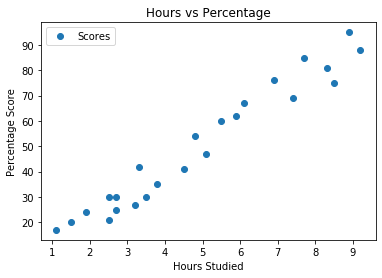

In [18]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show();

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<b>PREPARING THE DATA</b>


The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [19]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

<b> Training the Algorithm</b>


We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


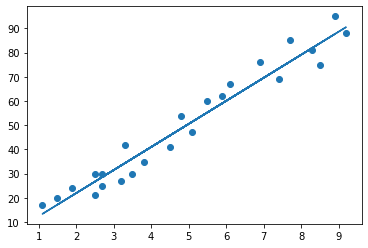

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

<b>Making Predictions</b>


Now that we have trained our algorithm, it's time to make some predictions.

In [23]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[5.9]
 [7.7]
 [3.8]
 [1.1]
 [2.7]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,62,59.079683
1,85,76.226845
2,35,39.074661
3,17,13.353917
4,30,28.595839


<b>Evaluating the model:-</b>


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.163675119844844
